In [ ]:
# Topics

# Iterators and Generators
# Difference between iterator and iterable
# Understand iter() and next() methods
# How to define our own iterators 
# Build our own for loop
# Create Custom class iterators
# What generators are and how they can be used
# Compare generator functions and generator expressions
# Use generators to pause execution of expensive functions


In [23]:
# Iterable - An object which will return an iterator when
# iter() is called on it
# eg. 'hello' is a string
# Now for loop cannot iterate over hello string
# First it should be converted to Iterator!!
# this is done by calling iter() function on the iterable
# Lets check hello is itertable or not

iter('hello')

# We get below output, that means its an Iterable
# Anything that returns an itertor when its passed to iter()
# is an iterable.


In [24]:
# Lets see whether list is an iterable or not?
# For loop cannot run on a list
# Internally For loop first runs iter() on the list
# It converts the list to an iterator
# Then it uses next() to iterate each item

a = [1,2,3,4,5]  # Dont know its an iterable or not
iter(a)

# We get an valid output, so 'a' is an iterable.

In [26]:
b = 100 
iter(b)

# b is not an iterable

TypeError: 'int' object is not iterable

In [27]:
# Lets see how for loop converts iterable and runs it

a = [1,2,3,4,5]

# Let apply next to it
next(a)

# We get error, because list ('a') is not a n iterator, yet!

TypeError: 'list' object is not an iterator

In [30]:
# So lets convert 'a' to iterator

iter(a)   # Now 'a' is converted to iterator

In [31]:
# Now we can apply next on this converted iterator
next(iter(a))

1

In [40]:
# or save iterator to a variable and run next() on the variable
a = [5,6,7]
i = iter(a)
next(i)   # now next returns 1st item

5

In [41]:
next(i)  # now next returns 2nd item

6

In [42]:
next(i) # Every time next returns the next item

7

In [43]:
next(i) # Until it reaches the end of loop

StopIteration: 

In [ ]:
# For loop internally handles this error and comes out of loop

In [45]:
# Another example

num = 10

# This is not an iterable
iter(num)

TypeError: 'int' object is not iterable

In [46]:
# But range(10) is iterable

num = range(10)
iter(num)

In [47]:
# so, lets save it to a variable

n = iter(num)
next(n)

0

In [48]:
next(n)  # and so on

1

In [52]:
# Another eg. on strings

s = 'welcome'
i = iter(s)
next(i)

'w'

In [53]:
next(i)  # and so on

'e'

In [ ]:
# Iterator - An object that can be iterated upon.
# An object which returns data, one element at a time
# when next() is called on it.

In [54]:
# In the previous egs
# Iterator = iter([1,2,3,45]), iter('welcome')

i1 = iter([1,2,3,45])
i2 = iter('welcome')

print(i1, i2)

# Here i1 and i2 are Iterators

<list_iterator object at 0x0000027F7688DB38> <str_iterator object at 0x0000027F7688D320>


In [ ]:
# Finally, lets test our understanding

# 'HELLO' is not an iterator, its an iterable
#  iter('HELLO') returns an iterator

In [ ]:
# What does the next() do

# When next() is called on a iterator,
# the iterator returns the next item.
# It keeps doing so until it raises
# an StopIteration error


In [56]:
# Lets create Custom For Loop

def my_for(iterable):
    iterator = iter(iterable)
    return next(iterator)
    
my_for('hello')    

'h'

In [57]:
my_for('hello')

'h'

In [58]:
my_for('hello')

'h'

In [60]:
# This will always return first char
# So lets add while loop

def my_for(iterable):
    iterator = iter(iterable)
    while True:
        print(next(iterator))
    
my_for('hello')    # this is working, we need to handle exception

h
e
l
l
o


StopIteration: 

In [65]:
# So lets add try and except

def my_for(iterable):
    iterator = iter(iterable)
    while True:
        try:
            print(next(iterator))
        except StopIteration:
            print('End of iterator')
            break
    
my_for('hello') 
my_for([5,6,7,8,9])

h
e
l
l
o
End of iterator
5
6
7
8
9
End of iterator


In [66]:
# This is working fine. But lets pass another func parameter
# eg. print or sum


def my_for(iterable, func):  # Here we are passing func 
    iterator = iter(iterable)
    while True:
        try:
            i = next(iterator)
        except StopIteration:
            break
        else:
            func(i)
            
my_for('manoj', print)  # its working fine

m
a
n
o
j


In [67]:
def my_for(iterable, func):  # Here we are passing func 
    iterator = iter(iterable)
    while True:
        try:
            i = next(iterator)
        except StopIteration:
            break
        else:
            func(i)

def square(num):
    print(num * num)
    
my_for([3,5,7,9], square)

9
25
49
81


In [ ]:
# How to create a custom Iterator
# i.e out output should match output of iter(item)

# Requirement:
for n in Counter(50,55):
    print(n)
    
# Basically, the above statement should give
50
51
52
53
54

In [68]:
for n in Counter(50,55):
    print(n)
    
# Right now, we get error

NameError: name 'Counter' is not defined

In [70]:
class Counter:
    def __init__(self, low, high):
        self.low = low
        self.high = high
        
    def __iter__(self):
        return iter('hello')  # Basically For loop calls __iter__()
    
for n in Counter(50,55):
    print(n)
    
# So we are custom writing __iter__ and then call iter() to create an iterator
# Now, this is working fine, lets handle the range

h
e
l
l
o


In [72]:
class Counter:
    def __init__(self, low, high):
        self.low = low
        self.high = high
        
    def __iter__(self):
        if self.low < self.high:
            return iter('hello')  # This logic will not work
    
for n in Counter(50,55):
    print(n)
    
# We need to return self in __iter__()
# The moment we return self, control automatically goes to next()
# so we need to handle next()

h
e
l
l
o


In [74]:
class Counter:
    def __init__(self, low, high):
        self.low = low
        self.high = high
        
    def __iter__(self):
        return self     # returns only self
    
   
for n in Counter(50,55):
    print(n)
    
# The below error, indicates next() requires an iterator

TypeError: iter() returned non-iterator of type 'Counter'

In [77]:
class Counter:
    def __init__(self, low, high):
        self.current = low   # Using another var current to save the value
        self.high = high
        
    def __iter__(self):
        return self     # returns only self
    
    def __next__(self):
        # Here we need to return data from low to high
        if self.current < self.high:
            num = self.current
            self.current += 1
            return num
        raise StopIteration

    
   
for n in Counter(50,55):
    print(n)
    
   
for n in Counter(0,10):
    print(n)

50
51
52
53
54
0
1
2
3
4
5
6
7
8
9


In [ ]:
# For Deck of cards, we cannot iterate over the cards
# We can add below method

def __iter__(self):
    return iter(self.cards)   # Thats it :)

# Once we understand generators, we can replace it with below code
def __iter__(self):
    for card in self.cards:
        yield card
        

In [ ]:
# Generators
# Generators are Iterators
# Every generator is an Iterator but not every Iterator is an Generator
# Generator are basically a quick and easy way to create iterators

# Generators can be created in 2 ways.
# Using generator functions - This uses the yield keyword
# Using generator expressions.

In [ ]:
# Functions v/s Generator Functions
# Note: Both functions and generators are defined using 'def'

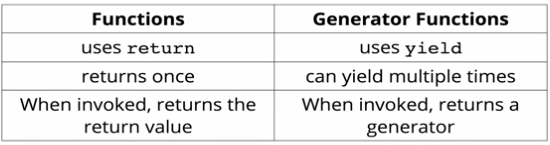

In [2]:
# Eg of first Generator

def count_up_to(max):
    count = 1
    while count <= max:
        yield count
        count += 1
        
count_up_to(5)

<generator object count_up_to at 0x0000017D631F3048>

In [ ]:
# Here what yield would do is,
# It will return the value of count and then pause (it doesnt go to the line count += 1)
# And it will stay that way until next() is called on count_up_to

In [9]:
# So to use it, if we just call count_up_to(5)
# It returns a generator object
# So lets save it to a variable

counter = count_up_to(5)
print(counter)

<generator object count_up_to at 0x0000017D63AA3B88>


In [10]:
# We cannot execute it as counter()
counter()


TypeError: 'generator' object is not callable

In [11]:
# We need to call next on the generator object 
next(counter)

1

In [12]:
# If we call next() again, we will get the next number
next(counter)

2

In [13]:
next(counter)

3

In [14]:
next(counter)

4

In [15]:
next(counter)

5

In [16]:
next(counter)

StopIteration: 

In [ ]:
# Whats happening here is, its keeping track of its state
# Unlike an function, it does the same thing over and over again
# In function it doesnt remember whats happening the last time.

# Here is the key thing about generator
# It does not store all the data in memory at once
# eg. 1,2,3,4,5
# It actually keeps the most recent one, yields and stop
# Next time it adds 1 to the state and keeps that and yields it and stops again

# It only knows one thing at a time until it encounters StopIteration
# With this we can easily write our own iterator

In [ ]:
# So we have basically a Counter which was done using iterators
# With Generators its easy
# We dont have to create class, setting up __init__
# writing dunder methods such as __iter__ and __next__

# With generators we dont have to do any of these
# Generator function returns a generator object
# And this object automatically calls dunder methods
# such as __iter__ and __next__

# But one thing we need to remember is we will not have
# all the data at once, we get one thing at a time.

In [18]:
counter = count_up_to(5)
for n in counter:
    print(n)

1
2
3
4
5


In [20]:
counter = count_up_to(5)
next(counter)

1

In [21]:
# Here the count starts from 2, instead of 1
# This is because we had manually run next() above
# It had already incremented by 1. We cannot go back.
# But we can re-initialize a new instance of that generator

for n in counter:
    print(n)

2
3
4
5


In [22]:
# We can see inbulit __iter__ and __next__ in generator object
help(counter)

Help on generator object:

count_up_to = class generator(object)
 |  Methods defined here:
 |  
 |  __del__(...)
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  close(...)
 |      close() -> raise GeneratorExit inside generator.
 |  
 |  send(...)
 |      send(arg) -> send 'arg' into generator,
 |      return next yielded value or raise StopIteration.
 |  
 |  throw(...)
 |      throw(typ[,val[,tb]]) -> raise exception in generator,
 |      return next yielded value or raise StopIteration.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  gi_code
 |  
 |  gi_frame
 |  
 |  gi_running
 |  
 |  gi_yieldfrom
 |      object being iterated by yield from, or None



In [ ]:
# Note: Generator takes very less memory and its only handle one item
# Eg. for sum() we dont have to pass an entire list
# We can just pass one item at a time i.e. we need to pass 
# a generator expression.

In [49]:
# Week Generator
# Write a function called week, it should return a generator that yields each day of the week
# Starting from Mon to Sun. After Sunday, the generator is exhausted.
# It does not start over.

def week():
    days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    day = 0
    while day < len(days):
        yield days[day]
        day += 1

In [50]:
days = week()

In [51]:
print(type(days))
for day in days:
    print(day)

<class 'generator'>
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday


In [35]:
# We can simplify it using for loop

def week():
    days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    for day in days:
        yield day
        
print(week())

<generator object week at 0x0000017D63AA3B88>


In [37]:
days = week()
next(days)

'Monday'

In [38]:
next(days)

'Tuesday'

In [43]:
next(days)

'Sunday'

In [44]:
next(days)

StopIteration: 

In [52]:
# Or we can just call
days = week()
print(type(days))
for day in days:
    print(day)
    
# As you can see, days is not a list 
# Its a generator object

<class 'generator'>
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday


In [54]:
# yes_or_no
# Write a function called yes_or_no
# which returns a generator that yields yes and no, then yes and no and then so on

def yes_or_no():
    val = 'yes'
    while True:
        yield val
        if val == 'yes':
            val = 'no'
        else:
            val = 'yes'
            
gen = yes_or_no()
gen

<generator object yes_or_no at 0x0000017D63AA38B8>

In [55]:
next(gen)

'yes'

In [56]:
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

no
yes
no
yes
no
yes


In [60]:
# We can write the above code using ternary expression

def yes_or_no():
    val = 'yes'
    while True:
        yield val
        val = 'no' if val == 'yes' else 'yes'
            
gen = yes_or_no()
print(gen)
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

<generator object yes_or_no at 0x0000017D63AA3E58>
yes
no
yes
no


In [ ]:
# Writing a Beat Making Generator
# Lets say we want 4 beats and repeat it
# 1,2,3,4,1,2,3,4,1,2,3,4
# Each time we want only one beat and not 1,2,3,4

In [65]:
# Lets try to create without generators

def beat():
    b = [1,2,3,4]
    count = 20
    i = 0
    c = 0
    while c < count:
        print(b[i])
        if i < len(b)-1:
            i += 1
        else:
            i = 0
        c += 1

beat()

1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4


In [70]:
# But here its printing all the numbers at once
# We need to output only one beat when we call beat() function
# This can only be achived by generators
# Generators are used to generate - infinite generator

def current_beat():
    nums = (1,2,3,4)
    i = 0
    while True:
        if i >= len(nums): i = 0
        yield nums[i]
        i += 1

In [71]:
counter = current_beat()
print(next(counter))
print(next(counter))
print(next(counter))
print(next(counter))
print(next(counter))
print(next(counter))
print(next(counter))
print(next(counter))
print(next(counter))
print(next(counter))
print(next(counter))
print(next(counter))

1
2
3
4
1
2
3
4
1
2
3
4


In [ ]:
# This code will return only beat at a time
# We dont have to have a gaint list will all the beats and loop it over.
# This is memory efficient and we can generate - infinite counters

In [88]:
# make_song - Write a song that follows below pattern

# '''
# kombucha_song = make_song(5, "kombucha")
# next(kombucha_song) # '5 bottles of kombucha on the wall.'
# next(kombucha_song) # '4 bottles of kombucha on the wall.'
# next(kombucha_song) # '3 bottles of kombucha on the wall.'
# next(kombucha_song) # '2 bottles of kombucha on the wall.'
# next(kombucha_song) # 'Only 1 bottle of kombucha left!'
# next(kombucha_song) # 'No more kombucha!'
# next(kombucha_song) # StopIteration

# default_song = make_song()
# next(default_song) # '99 bottles of soda on the wall.'
# '''

def make_song(num, drink):

    while num >= 0:
        song = f'{num} bottles of {drink} on the wall'
        if num == 1:
            song = f'Only 1 bottle of {drink} left!'
        if num == 0:
            song = f'No more {drink}!'
        yield song
        num -= 1
    
vodka_song = make_song(5,'vodka')
vodka_song

<generator object make_song at 0x0000017D63DAC570>

In [89]:
print(next(vodka_song))
print(next(vodka_song))
print(next(vodka_song))
print(next(vodka_song))
print(next(vodka_song))
print(next(vodka_song))
print(next(vodka_song))

5 bottles of vodka on the wall
4 bottles of vodka on the wall
3 bottles of vodka on the wall
2 bottles of vodka on the wall
Only 1 bottle of vodka left!
No more vodka!


StopIteration: 

In [93]:
# Here is the solution
# They are using For loop, so that StopIteration will be handled

def make_song(verses=99, beverage="soda"):
    for num in range(verses, -1, -1):
        if num > 1:
            yield "{} bottles of {} on the wall.".format(num, beverage)
        elif num == 1:
            yield "Only 1 bottle of {} left!".format(beverage)
        else:
            yield "No more {}!".format(beverage)
                    
vodka_song = make_song(5,'vodka')
vodka_song

<generator object make_song at 0x0000017D63DAC930>

In [94]:
print(next(vodka_song))
print(next(vodka_song))
print(next(vodka_song))
print(next(vodka_song))
print(next(vodka_song))
print(next(vodka_song))
print(next(vodka_song))

5 bottles of vodka on the wall.
4 bottles of vodka on the wall.
3 bottles of vodka on the wall.
2 bottles of vodka on the wall.
Only 1 bottle of vodka left!
No more vodka!


StopIteration: 

In [95]:
# Lets see how generators Excels
# We will test memory usage with generators

# This uses list() to create fibonacci series
def fib_list(max):
    nums = []
    a, b = 0, 1
    while len(nums) < max:
        nums.append(b)
        a, b = b, a + b
        
    return nums

print(fib_list(10))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [98]:
# This uses gen to create fibonacci series
def fib_gen(max):
    a, b = 0, 1
    count = 0
    while count < max:
        a, b = b, a + b
        yield a
        count += 1
        
        
for n in fib_gen(10):
    print(n)

1
1
2
3
5
8
13
21
34
55


In [ ]:
# So both are return the same result.
# But one hold all the numbers in memory and another only holds one item

# So if we run this for 1 million fibonacci number
# fib_list(10000) and fib_gen(1000000)

# fib_list takes upto 500 MB memory
# but fib_gen takes up only 6 MB memory

# So generators is much much memory efficient

In [102]:
# get_multiples

def get_multiples(number=1, count=10):
    for n in range(1,count+1):
        yield n * number
        
get_multiples()

<generator object get_multiples at 0x0000017D63DACA98>

In [104]:
evens = get_multiples(2, 3)
print(next(evens)) # 2
print(next(evens)) # 4
print(next(evens)) # 6
print(next(evens)) # StopIteration

2
4
6


StopIteration: 

In [105]:
default_multiples = get_multiples()
list(default_multiples)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [106]:
# another eg, get_unlimited_multiples

def get_unlimited_multiples(mul=1):
    num = 1
    while True:
        yield num * mul
        num += 1
        
sevens = get_unlimited_multiples(7)
[next(sevens) for i in range(15)] 

[7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98, 105]

In [107]:
ones = get_unlimited_multiples()
[next(ones) for i in range(20)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
# Note: Up until now we have seen how generator function works
# Now lets see what is a Generator Expression

# Generator Expressions are used to create generators as well
# They look similar to list comprehensions
# Generator Expressions uses () instead of []

In [108]:
# Lets create a generator using function and expression

def nums():
    for num in range(1,10):
        yield num
        
print(nums())

<generator object nums at 0x0000017D63DACD68>


In [109]:
# We have created a generator using function

g = nums()
print(next(g))
print(next(g))
print(next(g))
print(next(g))
print(next(g))

1
2
3
4
5


In [111]:
# With a single line we have created a generator

g_e = (num for num in range(1,10))
g_e

# If you see the output it says, we got this generator
# By using <genexpr>, whereas for above
# It shows the name of the function nums()

<generator object <genexpr> at 0x0000017D63DACED0>

In [112]:
# Using next() we get next items

print(next(g_e))
print(next(g_e))
print(next(g_e))
print(next(g_e))
print(next(g_e))
print(next(g_e))

1
2
3
4
5
6


In [113]:
# We can write the same thing using list

l = [n for n in range(1,10)]
l

# But here all the items are stored in one single list

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
# Whereas in generators only item is used
# We can take this to our advantage for sum()
# If we use list, first the list is created and then its summed
# But in gen, only one item is handled each time

# Both are different approaches and gen save lot of time

In [3]:
# Lets test this

import time

start_time = time.time()
print(sum([n for n in range(1,100000000)]))
end_time = time.time()
print(f'Time taken by List - {end_time - start_time}')

start_time = time.time()
print(sum((n for n in range(1,100000000))))
end_time = time.time()
print(f'Time taken by Gen - {end_time - start_time}')


# Its a very big difference w.r.t to CPU time

4999999950000000
Time taken by List - 22.368995904922485
4999999950000000
Time taken by Gen - 11.466827154159546
